## Data Preprocessing

In [85]:
import numpy as np
import pandas as pd

In [86]:
# Power load dataset
load_dataset = pd.read_csv("data/load_data_clean.csv")
# Meterological dataset
met_dataset = pd.read_csv("data/met_data_clean.csv")

In [87]:
load_df = pd.DataFrame(load_dataset)
met_df = pd.DataFrame(met_dataset)

In [88]:
load_df["DATE (MM/DD/YYYY)"] = pd.to_datetime(
    load_df["DATE (MM/DD/YYYY)"], format="%m/%d/%Y"
)

met_df["DATE (MM/DD/YYYY)"] = pd.to_datetime(
    met_df["DATE (MM/DD/YYYY)"], format="%m/%d/%Y"
)

In [89]:
load_df.head()

,DATE (MM/DD/YYYY),KW,KWS,CHWTON,HTmmBTU,Combined mmBTU,Combined Tons Carbon,KW#Houses,KWlightbulbs,KWgalsgas,...,CHWTONlightbulbs,CHWTONgalsgas,HTmmBTU#Houses,HTmmBTUlightbulbs,HTmmBTUgalsgas,Total#Houses,Totallightbulbs,Totalgalsgas,GHG,DOW
0,2024-05-01,351973.45,39367.64,117009.06,115.27,2720.37,497.21,100564,25140971,9608,...,29385656,11233,9652,2412510,922,227789,56939137,969870,169.754,4
1,2024-05-02,353826.38,39144.04,119220.71,115.03,2752.99,503.17,101093,25273323,9658,...,29941089,11445,9632,2407457,920,230520,57621868,987740,170.867,5
2,2024-05-03,357657.88,38935.34,123171.43,109.79,2808.22,513.27,102188,25547001,9763,...,30933274,11824,9193,2297666,878,235145,58777940,1019713,173.062,6
3,2024-05-04,363958.25,38676.54,118279.24,108.33,2769.56,506.20,103988,25997028,9935,...,29704649,11355,9071,2267263,867,231908,57968940,981181,176.630,7
4,2024-05-05,320144.95,33341.16,106070.52,108.39,2473.62,452.11,91470,22867506,8739,...,26638552,10183,9076,2268428,867,207127,51774485,879305,155.741,1


Here is an explanation of each data column of load dataset:

1. **DATE (MM/DD/YYYY):**
   - **Description:** The date in the format Month/Day/Year.
   - **Example:** `05/01/2024` represents May 1, 2024.

2. **KW:**
   - **Description:** The total kilowatt (KW) power consumption for the day.
   - **Example:** `351973.45` KW represents the total power consumption on the given day.

3. **KWS:**
   - **Description:** The total power consumption in kilowatt-hours (KWH).
   - **Example:** `39367.64` KWS represents the total power consumption in KWH.

4. **CHWTON:**
   - **Description:** The total cooling energy consumption in cooling tons.
   - **Example:** `117009.06` CHWTON represents the cooling energy consumption.

5. **HTmmBTU:**
   - **Description:** The total heating energy consumption in million British thermal units (mmBTU).
   - **Example:** `115.27` HTmmBTU represents the heating energy consumption.

6. **Combined mmBTU:**
   - **Description:** The combined energy consumption (cooling and heating) in million British thermal units (mmBTU).
   - **Example:** `2720.37` Combined mmBTU represents the combined energy consumption.

7. **Combined Tons Carbon:**
   - **Description:** The combined carbon emissions in tons.
   - **Example:** `497.21` Combined Tons Carbon represents the total carbon emissions.

8. **KW#Houses:**
   - **Description:** The equivalent number of houses that the KW consumption can power.
   - **Example:** `100564` houses can be powered by the KW consumption.

9. **KWlightbulbs:**
   - **Description:** The equivalent number of lightbulbs that the KW consumption can power.
   - **Example:** `25140971` lightbulbs can be powered by the KW consumption.

10. **KWgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the KW consumption can power.
    - **Example:** `9608` gallons of gasoline can be powered by the KW consumption.

11. **CHWTON#Houses:**
    - **Description:** The equivalent number of houses that the cooling energy (CHWTON) consumption can power.
    - **Example:** `117572` houses can be powered by the cooling energy consumption.

12. **CHWTONlightbulbs:**
    - **Description:** The equivalent number of lightbulbs that the cooling energy (CHWTON) consumption can power.
    - **Example:** `29385656` lightbulbs can be powered by the cooling energy consumption.

13. **CHWTONgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the cooling energy (CHWTON) consumption can power.
    - **Example:** `11233` gallons of gasoline can be powered by the cooling energy consumption.

14. **HTmmBTU#Houses:**
    - **Description:** The equivalent number of houses that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `9652` houses can be powered by the heating energy consumption.

15. **HTmmBTUlightbulbs:**
    - **Description:** The equivalent number of lightbulbs that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `2412510` lightbulbs can be powered by the heating energy consumption.

16. **HTmmBTUgalsgas:**
    - **Description:** The equivalent number of gallons of gasoline that the heating energy (HTmmBTU) consumption can power.
    - **Example:** `922` gallons of gasoline can be powered by the heating energy consumption.

17. **Total#Houses:**
    - **Description:** The total equivalent number of houses that the combined energy consumption can power.
    - **Example:** `227789` houses can be powered by the combined energy consumption.

18. **Totallightbulbs:**
    - **Description:** The total equivalent number of lightbulbs that the combined energy consumption can power.
    - **Example:** `56939137` lightbulbs can be powered by the combined energy consumption.

19. **Totalgalsgas:**
    - **Description:** The total equivalent number of gallons of gasoline that the combined energy consumption can power.
    - **Example:** `969870` gallons of gasoline can be powered by the combined energy consumption.

20. **GHG:**
    - **Description:** Greenhouse gas emissions.
    - **Example:** `169.754` represents the greenhouse gas emissions.

21. **DOW:**
    - **Description:** Day of the week, where 1 represents Monday, 2 represents Tuesday, etc.
    - **Example:** `4` represents Thursday.

In [90]:
met_df.head()

,DATE (MM/DD/YYYY),AVG Air Temperature [deg F],MAX Air Temperature [deg F],MIN Air Temperature [deg F],AVG Rel Humidity [%],MAX Rel Humidity [%],MIN Rel Humidity [%],AVG Avg Wind Speed @ 3m [MPH],MAX Avg Wind Speed @ 3m [MPH],MIN Avg Wind Speed @ 3m [MPH],AVG Peak Wind Speed @ 3m [MPH],MAX Peak Wind Speed @ 3m [MPH],MIN Peak Wind Speed @ 3m [MPH],AVG Station Pressure [inHg],MAX Station Pressure [inHg],MIN Station Pressure [inHg]
0,2024-05-01,76.2268,87.494,61.322,19.3349,34.09,8.040,7.5972,24.4721,0.0,11.1715,30.6460,0.0,27.2098,27.2561,27.1436
1,2024-05-02,76.1305,89.690,60.836,18.6194,36.39,6.938,5.1366,22.8839,0.0,8.0311,27.2906,0.0,27.2407,27.2873,27.1868
2,2024-05-03,77.3261,89.960,63.878,19.7970,41.99,6.877,5.7147,23.8457,0.0,8.8923,39.0345,0.0,27.2277,27.2663,27.1653
3,2024-05-04,76.8995,89.762,61.106,17.8820,31.30,6.234,5.5733,20.5574,0.0,8.6903,25.6129,0.0,27.2277,27.2670,27.1798
4,2024-05-05,75.1771,86.774,63.176,18.5651,30.04,9.040,11.2813,32.4132,0.0,16.0872,44.0676,0.0,27.2212,27.2677,27.1493


Here is an explanation of each column in the meteorological dataset:

1. **DATE (MM/DD/YYYY):**
   - **Description:** The date in the format Month/Day/Year.
   - **Example:** `05/01/2024` represents May 1, 2024.

2. **AVG Air Temperature [deg F]:**
   - **Description:** The average air temperature in degrees Fahrenheit for the day.
   - **Example:** `76.2268` degrees Fahrenheit.

3. **MAX Air Temperature [deg F]:**
   - **Description:** The maximum air temperature in degrees Fahrenheit for the day.
   - **Example:** `87.494` degrees Fahrenheit.

4. **MIN Air Temperature [deg F]:**
   - **Description:** The minimum air temperature in degrees Fahrenheit for the day.
   - **Example:** `61.322` degrees Fahrenheit.

5. **AVG Rel Humidity [%]:**
   - **Description:** The average relative humidity as a percentage for the day.
   - **Example:** `19.3349%`.

6. **MAX Rel Humidity [%]:**
   - **Description:** The maximum relative humidity as a percentage for the day.
   - **Example:** `34.09%`.

7. **MIN Rel Humidity [%]:**
   - **Description:** The minimum relative humidity as a percentage for the day.
   - **Example:** `8.04%`.

8. **AVG Avg Wind Speed @ 3m [MPH]:**
   - **Description:** The average wind speed at 3 meters above ground level in miles per hour for the day.
   - **Example:** `7.5972` miles per hour.

9. **MAX Avg Wind Speed @ 3m [MPH]:**
   - **Description:** The maximum average wind speed at 3 meters above ground level in miles per hour for the day.
   - **Example:** `24.4721` miles per hour.

10. **MIN Avg Wind Speed @ 3m [MPH]:**
    - **Description:** The minimum average wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `0.0` miles per hour.

11. **AVG Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The average peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `11.1715` miles per hour.

12. **MAX Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The maximum peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `30.646` miles per hour.

13. **MIN Peak Wind Speed @ 3m [MPH]:**
    - **Description:** The minimum peak wind speed at 3 meters above ground level in miles per hour for the day.
    - **Example:** `0.0` miles per hour.

14. **AVG Station Pressure [inHg]:**
    - **Description:** The average station pressure in inches of mercury for the day.
    - **Example:** `27.2098` inches of mercury.

15. **MAX Station Pressure [inHg]:**
    - **Description:** The maximum station pressure in inches of mercury for the day.
    - **Example:** `27.2561` inches of mercury.

16. **MIN Station Pressure [inHg]:**
    - **Description:** The minimum station pressure in inches of mercury for the day.
    - **Example:** `27.1436` inches of mercury.

These columns represent various meteorological measurements that can influence power load and consumption patterns. By incorporating this data into our analysis, we can build models that account for the impact of weather conditions on power usage.

In [91]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE (MM/DD/YYYY)     61 non-null     datetime64[ns]
 1   KW                    61 non-null     float64       
 2   KWS                   61 non-null     float64       
 3   CHWTON                61 non-null     float64       
 4   HTmmBTU               61 non-null     float64       
 5   Combined mmBTU        61 non-null     float64       
 6   Combined Tons Carbon  61 non-null     float64       
 7   KW#Houses             61 non-null     int64         
 8   KWlightbulbs          61 non-null     int64         
 9   KWgalsgas             61 non-null     int64         
 10  CHWTON#Houses         61 non-null     int64         
 11  CHWTONlightbulbs      61 non-null     int64         
 12  CHWTONgalsgas         61 non-null     int64         
 13  HTmmBTU#Houses        

In [92]:
met_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE (MM/DD/YYYY)               61 non-null     datetime64[ns]
 1   AVG Air Temperature [deg F]     61 non-null     float64       
 2   MAX Air Temperature [deg F]     61 non-null     float64       
 3   MIN Air Temperature [deg F]     61 non-null     float64       
 4   AVG Rel Humidity [%]            61 non-null     float64       
 5   MAX Rel Humidity [%]            61 non-null     float64       
 6   MIN Rel Humidity [%]            61 non-null     float64       
 7   AVG Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 8   MAX Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 9   MIN Avg Wind Speed @ 3m [MPH]   61 non-null     float64       
 10  AVG Peak Wind Speed @ 3m [MPH]  61 non-null     float64       
 11  MAX Peak

In [93]:
merged_df = pd.merge(load_df, met_df, on="DATE (MM/DD/YYYY)", how="inner")

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   DATE (MM/DD/YYYY)               61 non-null     datetime64[ns]
 1   KW                              61 non-null     float64       
 2   KWS                             61 non-null     float64       
 3   CHWTON                          61 non-null     float64       
 4   HTmmBTU                         61 non-null     float64       
 5   Combined mmBTU                  61 non-null     float64       
 6   Combined Tons Carbon            61 non-null     float64       
 7   KW#Houses                       61 non-null     int64         
 8   KWlightbulbs                    61 non-null     int64         
 9   KWgalsgas                       61 non-null     int64         
 10  CHWTON#Houses                   61 non-null     int64         
 11  CHWTONli

In [95]:
merged_df.head()

,DATE (MM/DD/YYYY),KW,KWS,CHWTON,HTmmBTU,Combined mmBTU,Combined Tons Carbon,KW#Houses,KWlightbulbs,KWgalsgas,...,MIN Rel Humidity [%],AVG Avg Wind Speed @ 3m [MPH],MAX Avg Wind Speed @ 3m [MPH],MIN Avg Wind Speed @ 3m [MPH],AVG Peak Wind Speed @ 3m [MPH],MAX Peak Wind Speed @ 3m [MPH],MIN Peak Wind Speed @ 3m [MPH],AVG Station Pressure [inHg],MAX Station Pressure [inHg],MIN Station Pressure [inHg]
0,2024-05-01,351973.45,39367.64,117009.06,115.27,2720.37,497.21,100564,25140971,9608,...,8.040,7.5972,24.4721,0.0,11.1715,30.6460,0.0,27.2098,27.2561,27.1436
1,2024-05-02,353826.38,39144.04,119220.71,115.03,2752.99,503.17,101093,25273323,9658,...,6.938,5.1366,22.8839,0.0,8.0311,27.2906,0.0,27.2407,27.2873,27.1868
2,2024-05-03,357657.88,38935.34,123171.43,109.79,2808.22,513.27,102188,25547001,9763,...,6.877,5.7147,23.8457,0.0,8.8923,39.0345,0.0,27.2277,27.2663,27.1653
3,2024-05-04,363958.25,38676.54,118279.24,108.33,2769.56,506.20,103988,25997028,9935,...,6.234,5.5733,20.5574,0.0,8.6903,25.6129,0.0,27.2277,27.2670,27.1798
4,2024-05-05,320144.95,33341.16,106070.52,108.39,2473.62,452.11,91470,22867506,8739,...,9.040,11.2813,32.4132,0.0,16.0872,44.0676,0.0,27.2212,27.2677,27.1493


## Data Preprocessing

In [96]:
from sklearn.preprocessing import MinMaxScaler

#### Step 1: Train-Test Split (80% training, 20% testing)

In [97]:
train_size = int(len(merged_df) * 0.8)
train_data = merged_df[:train_size]
test_data = merged_df[train_size:]

#### Step 2: Select relevant columns for normalization

Electric load, Cooling load, Heating load, Temperature, Humidity, Irradiance (if present)

In [98]:
features_to_normalize = [
    "KW",
    "CHWTON",
    "HTmmBTU",
    "AVG Air Temperature [deg F]",
    "AVG Rel Humidity [%]",
]

Initialize MinMaxScaler

In [99]:
scaler = MinMaxScaler()

Fit the scaler on the training data and transform both train and test data

In [100]:
train_scaled = train_data.copy()
train_scaled[features_to_normalize] = scaler.fit_transform(
    train_data[features_to_normalize]
)

test_scaled = test_data.copy()
test_scaled[features_to_normalize] = scaler.transform(test_data[features_to_normalize])

#### Step 3: Time Series Preparation (Create sliding window sequences)

In [101]:
sequence_length = 7  # Use past 7 days to predict the next day

def create_sequences(data, target_column, sequence_length):
    sequences = []
    targets = []

    for i in range(len(data) - sequence_length):
        seq = data[i : i + sequence_length]  # Sequence of 'n' days
        target = data[i + sequence_length][target_column+1]  # Target is the next day's load (KW)
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

Create sequences for training and testing sets

In [102]:
X_train, y_train = create_sequences(
    train_scaled[features_to_normalize].values,
    target_column=0,
    sequence_length=sequence_length,
)  # KW is the target
X_test, y_test = create_sequences(
    test_scaled[features_to_normalize].values,
    target_column=0,
    sequence_length=sequence_length,
)

# Print the shape of training and testing data
print("Training data shape (X, y):", X_train.shape, y_train.shape)
print("Testing data shape (X, y):", X_test.shape, y_test.shape)

Training data shape (X, y): (41, 7, 5) (41,)
Testing data shape (X, y): (6, 7, 5) (6,)


### Model Construction

In [103]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from torch.optim.lr_scheduler import ReduceLROnPlateau

#### Step 1: Convert data to PyTorch tensors

In [104]:
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)
X_test_tensor = torch.Tensor(X_test)
y_test_tensor = torch.Tensor(y_test)

#### Step 2: Define the LSTM model

In [105]:
# Define the LSTM model with L2 regularization
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_feature_map = lstm_out[:, -1, :]
        out = self.fc(final_feature_map)
        return out

Initialize the model, loss function, and optimizer

In [106]:
# Initialize model, loss function, and optimizer with L2 regularization
input_dim = len(features_to_normalize)
hidden_dim = 50
output_dim = 1
dropout = 0.2

In [107]:
model = LSTMModel(input_dim, hidden_dim, output_dim, num_layers=2, dropout=dropout)
criterion = nn.MSELoss()
optimizer = optim.Adam(
    model.parameters(), lr=0.0001, weight_decay=0.01
)  # Adding L2 regularization
scheduler = ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=20,
)
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

tensor(0.)

#### Step 3: Training loop

In [108]:
num_epochs = 200
batch_size = 16
patience = 20
best_loss = float("inf")
patience_counter = 0

Create DataLoader for training and validation data

In [109]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True
)

In [110]:
epoch_losses = list()
test_losses = list()

In [111]:
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch_X, batch_y in train_loader:
        outputs = model(batch_X)
        loss = criterion(outputs.squeeze(), batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_X.size(0)

    avg_epoch_loss = epoch_loss / len(train_loader.dataset)
    epoch_losses.append(avg_epoch_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}")

    # Validation phase
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = mean_squared_error(y_test_tensor, test_outputs.squeeze())
        test_losses.append(test_loss)
        print(f"Test Loss: {test_loss:.4f}")

# Save the model
torch.save(model.state_dict(), "lstm_model.pth")
        # Early stopping
        # if test_loss < best_loss:
        #     best_loss = test_loss
        #     patience_counter = 0
        #     # Save the best model
        # else:
        #     patience_counter += 1
        #     if patience_counter >= patience:
        #         print(f"Early stopping triggered at Epoch({epoch})")
        #         # break
        # print(f"Patience Counter: {patience_counter}")

Epoch [1/200], Loss: 0.3515
Test Loss: 1.9404
Epoch [2/200], Loss: 0.3479
Test Loss: 1.9288
Epoch [3/200], Loss: 0.3432
Test Loss: 1.9169
Epoch [4/200], Loss: 0.3399
Test Loss: 1.9051
Epoch [5/200], Loss: 0.3354
Test Loss: 1.8933
Epoch [6/200], Loss: 0.3318
Test Loss: 1.8815
Epoch [7/200], Loss: 0.3273
Test Loss: 1.8698
Epoch [8/200], Loss: 0.3238
Test Loss: 1.8579
Epoch [9/200], Loss: 0.3195
Test Loss: 1.8462
Epoch [10/200], Loss: 0.3173
Test Loss: 1.8343
Epoch [11/200], Loss: 0.3128
Test Loss: 1.8226
Epoch [12/200], Loss: 0.3091
Test Loss: 1.8106
Epoch [13/200], Loss: 0.3048
Test Loss: 1.7985
Epoch [14/200], Loss: 0.3003
Test Loss: 1.7860
Epoch [15/200], Loss: 0.2977
Test Loss: 1.7734
Epoch [16/200], Loss: 0.2935
Test Loss: 1.7607
Epoch [17/200], Loss: 0.2905
Test Loss: 1.7482
Epoch [18/200], Loss: 0.2863
Test Loss: 1.7351
Epoch [19/200], Loss: 0.2816
Test Loss: 1.7220
Epoch [20/200], Loss: 0.2775
Test Loss: 1.7085
Epoch [21/200], Loss: 0.2745
Test Loss: 1.6947
Epoch [22/200], Loss: 

In [112]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [113]:
print(f"Epoch\t\tMin: {min(epoch_losses):.4f}\t Max: {max(epoch_losses):.4f}")
print(f"Test\t\tMin: {min(test_losses):.4f}\t Max: {max(test_losses):.4f}")

Epoch		Min: 0.0286	 Max: 0.3515
Test		Min: 0.3691	 Max: 1.9404


In [114]:
ep_data = pd.DataFrame({"Epoch Loss": epoch_losses})
test_data = pd.DataFrame({"Test Loss": test_losses})

In [115]:
# Create a subplot with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2)

# Add the line chart to both subplots
fig.add_trace(
    go.Scatter(x=ep_data.index, y=ep_data["Epoch Loss"], mode="lines", name="Epoch Loss"),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(x=test_data.index, y=test_data["Test Loss"], mode="lines", name="Test Loss"),
    row=1,
    col=2,
)

# Update axis labels
fig.update_xaxes(title_text="Epoch", row=1, col=1)
fig.update_xaxes(title_text="Epoch", row=1, col=2)
fig.update_yaxes(title_text="Epoch Loss", row=1, col=1)
fig.update_yaxes(title_text="Test Loss", row=1, col=2)

# Set subplot layout
fig.update_layout(title="Loss over Epoch", title_x=0.5,title_font=dict(size=25, weight='bold'), showlegend=True)

# Show the plot
fig.show()

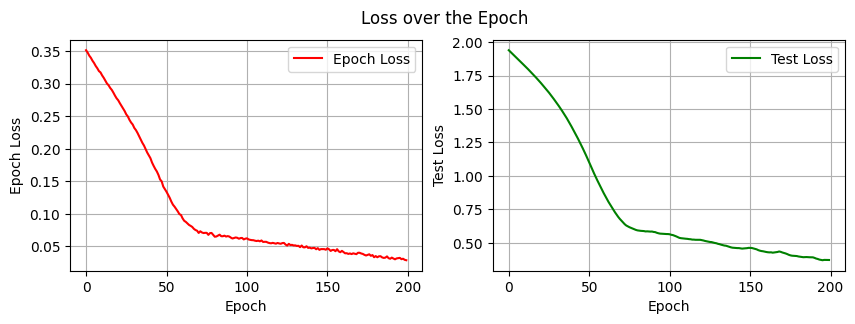

In [116]:
# Plot training & validation loss values
plt.figure(figsize=(10, 3))
plt.suptitle("Loss over the Epoch")

plt.subplot(1, 2, 1)
plt.plot(np.array(epoch_losses), color="r")
plt.ylabel("Epoch Loss")
plt.xlabel("Epoch")
plt.legend(["Epoch Loss"], loc="upper right")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.array(test_losses), color="g")
plt.ylabel("Test Loss")
plt.xlabel("Epoch")
plt.legend(["Test Loss"], loc="upper right")
plt.grid(True)

plt.show()

#### Step 4: Evaluation

In [117]:
# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

Device: cpu


In [118]:
# Step 1: Define the device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Convert your data to tensors and move them to the device
X_test_tensor = torch.Tensor(X_test).to(device)
y_test_tensor = torch.Tensor(y_test).to(device)

# Move the model to the device if not already done
model = model.to(device)

In [119]:
# Set the model to evaluation mode
model.eval()

LSTMModel(
  (lstm): LSTM(5, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [120]:
# Step 3: Generate predictions and compute the loss on the test data
with torch.no_grad():  # Disable gradient calculation for evaluation
    # Forward pass: get predictions
    predictions = model(X_test_tensor)

    # If predictions are multi-dimensional, make sure to match the output
    predictions = predictions.squeeze()

    # Calculate loss (assuming you're using Mean Squared Error)
    criterion = torch.nn.MSELoss()
    loss = criterion(predictions, y_test_tensor)

    print(f"Test Loss: {loss.item():.4f}")

Test Loss: 0.3708


In [121]:
# Step 4: Convert predictions and actual values back to CPU and NumPy for comparison
predictions_cpu = predictions.cpu().numpy()
y_test_cpu = y_test_tensor.cpu().numpy()

print(f"Predicted Values: {predictions_cpu}")
print(f"Actual values: {y_test_cpu}")

Predicted Values: [0.76564103 0.7645915  0.7617236  0.761502   0.74005765 0.7416981 ]
Actual values: [1.3070358 1.3611301 1.3558723 1.13315   1.3617148 1.5772915]


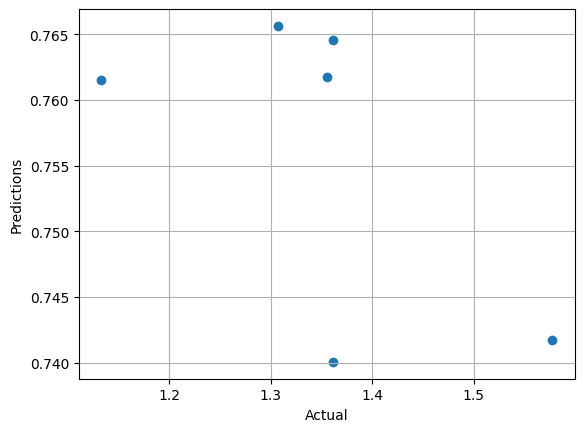

In [122]:
plt.scatter(x=np.array(y_test_cpu), y=np.array(predictions_cpu))
plt.xlabel("Actual")
plt.ylabel("Predictions")
plt.grid(True)
plt.show()

In [123]:
# Calculate MSE
mse = np.mean((np.array(y_test_cpu) - np.array(predictions_cpu)) ** 2)
print(f"MSE: {mse:.4f}")


# And then calculate RMSE:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

MSE: 0.3708
RMSE: 0.6089


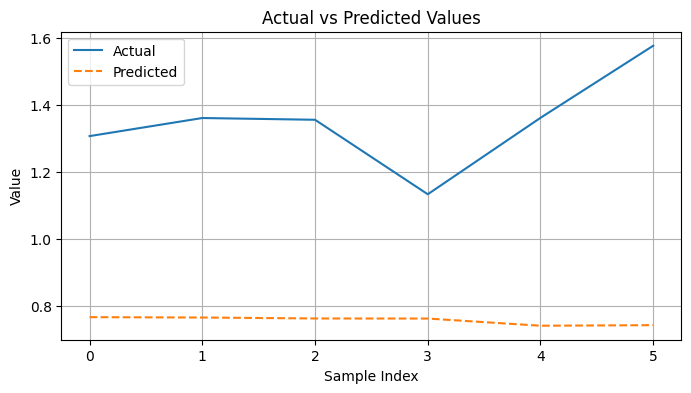

In [124]:
# Step 5: Optionally, you can print or plot the actual vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(y_test_cpu, label="Actual")
plt.plot(predictions_cpu, label="Predicted", linestyle="--")
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [125]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs.squeeze(), y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.3708
